[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

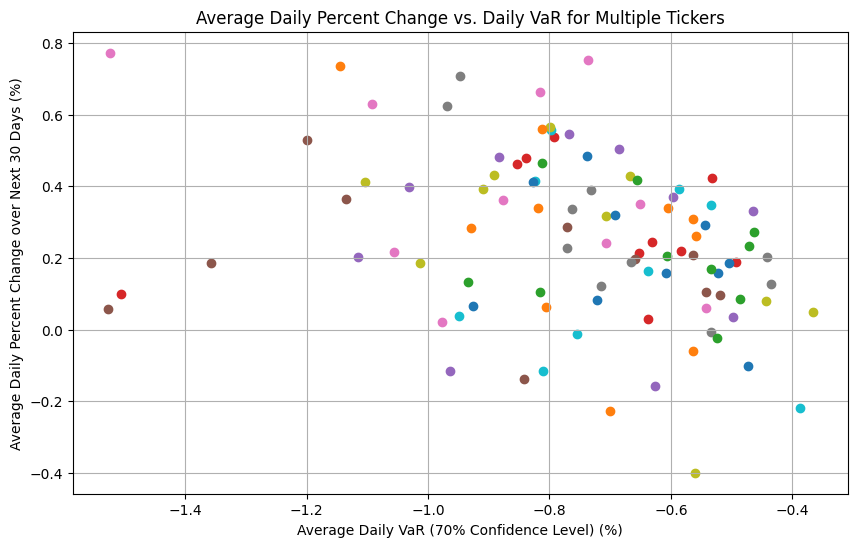

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Define the tickers and initial date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 
           'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 
           'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 
           'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 
           'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 
           'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 
           'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO']
start_date = "2022-01-01"
end_date = "2024-01-01"
confidence_level = 0.7  # VaR confidence level (5th percentile)
forward_days = 30  # Number of forward days to calculate rolling daily VaR

# Initialize lists to store average values for each ticker
average_daily_vars = []
average_daily_changes = []

for ticker in tickers:
    # Download historical price data
    data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]

    # Calculate daily returns
    daily_returns = data.pct_change().dropna()

    # Initialize list to store daily 1-day VaRs for the forward period
    daily_vars = []

    # Calculate 1-day VaR for each day in the forward period
    for day in range(forward_days):
        # Define the end date for each rolling 2-year window
        window_end_date = pd.to_datetime(end_date) + timedelta(days=day + 1)
        window_start_date = window_end_date - timedelta(days=2*365)  # 2-year look-back period

        # Filter data for the rolling 2-year window
        rolling_data = daily_returns[(daily_returns.index >= window_start_date) & (daily_returns.index <= window_end_date)]

        # Calculate the 1-day VaR at the specified confidence level
        if not rolling_data.empty:
            var_1_day = np.percentile(rolling_data, (1-confidence_level) * 100)
            daily_vars.append(var_1_day)

    # Calculate the average of these daily VaR values over the 30-day forward period
    average_daily_var = np.mean(daily_vars)
    average_daily_vars.append(average_daily_var * 100)  # Convert to percentage

    # Calculate the average daily percent change over the next 30 days
    average_daily_return_30_days = daily_returns[-30:].mean() * 100  # Convert to percentage
    average_daily_changes.append(average_daily_return_30_days)

# Plotting for multiple tickers without a legend
plt.figure(figsize=(10, 6))
for i in range(len(tickers)):
    # Plot a single point per ticker without a legend
    plt.scatter(average_daily_vars[i], average_daily_changes[i])

plt.xlabel("Average Daily VaR (70% Confidence Level) (%)")
plt.ylabel("Average Daily Percent Change over Next 30 Days (%)")
plt.title("Average Daily Percent Change vs. Daily VaR for Multiple Tickers")
plt.grid(True)
plt.show()